In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [3]:
df["t"] = df.index.strftime("%m")#month extraction

In [4]:
df

,Passengers,t
Month,,
1995-01-01,112,01
1995-02-01,118,02
1995-03-01,132,03
1995-04-01,129,04
1995-05-01,121,05
...,...,...
2002-08-01,405,08
2002-09-01,355,09
2002-10-01,306,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Passengers  96 non-null     int64 
 1   t           96 non-null     object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df['log_of_passengers']=np.log(df['Passengers'])
df

,Passengers,t,log_of_passengers
Month,,,
1995-01-01,112,01,4.718499
1995-02-01,118,02,4.770685
1995-03-01,132,03,4.882802
1995-04-01,129,04,4.859812
1995-05-01,121,05,4.795791
...,...,...,...
2002-08-01,405,08,6.003887
2002-09-01,355,09,5.872118
2002-10-01,306,10,5.723585


In [7]:
df['t'] = pd.to_numeric(df['t'], errors='coerce')
df['square_of_t']=np.square(df['t'])
df

,Passengers,t,log_of_passengers,square_of_t
Month,,,,
1995-01-01,112,1,4.718499,1
1995-02-01,118,2,4.770685,4
1995-03-01,132,3,4.882802,9
1995-04-01,129,4,4.859812,16
1995-05-01,121,5,4.795791,25
...,...,...,...,...
2002-08-01,405,8,6.003887,64
2002-09-01,355,9,5.872118,81
2002-10-01,306,10,5.723585,100


In [8]:
df['t_copy'] = df['t']
df = pd.get_dummies(df, columns=['t'])
df

,Passengers,log_of_passengers,square_of_t,t_copy,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12
Month,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,4.770685,4,2,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,4.882802,9,3,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4.859812,16,4,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,4.795791,25,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,6.003887,64,8,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,355,5.872118,81,9,0,0,0,0,0,0,0,0,1,0,0,0
2002-10-01,306,5.723585,100,10,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
df = df.rename(columns={'t_copy': 't'})
df

,Passengers,log_of_passengers,square_of_t,t,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12
Month,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,4.770685,4,2,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,4.882802,9,3,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4.859812,16,4,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,4.795791,25,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,6.003887,64,8,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,355,5.872118,81,9,0,0,0,0,0,0,0,0,1,0,0,0
2002-10-01,306,5.723585,100,10,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Passengers         96 non-null     int64  
 1   log_of_passengers  96 non-null     float64
 2   square_of_t        96 non-null     int64  
 3   t                  96 non-null     int64  
 4   t_1                96 non-null     uint8  
 5   t_2                96 non-null     uint8  
 6   t_3                96 non-null     uint8  
 7   t_4                96 non-null     uint8  
 8   t_5                96 non-null     uint8  
 9   t_6                96 non-null     uint8  
 10  t_7                96 non-null     uint8  
 11  t_8                96 non-null     uint8  
 12  t_9                96 non-null     uint8  
 13  t_10               96 non-null     uint8  
 14  t_11               96 non-null     uint8  
 15  t_12               96 non-null     uint8  
dtypes: float

<Axes: xlabel='Month', ylabel='Passengers'>

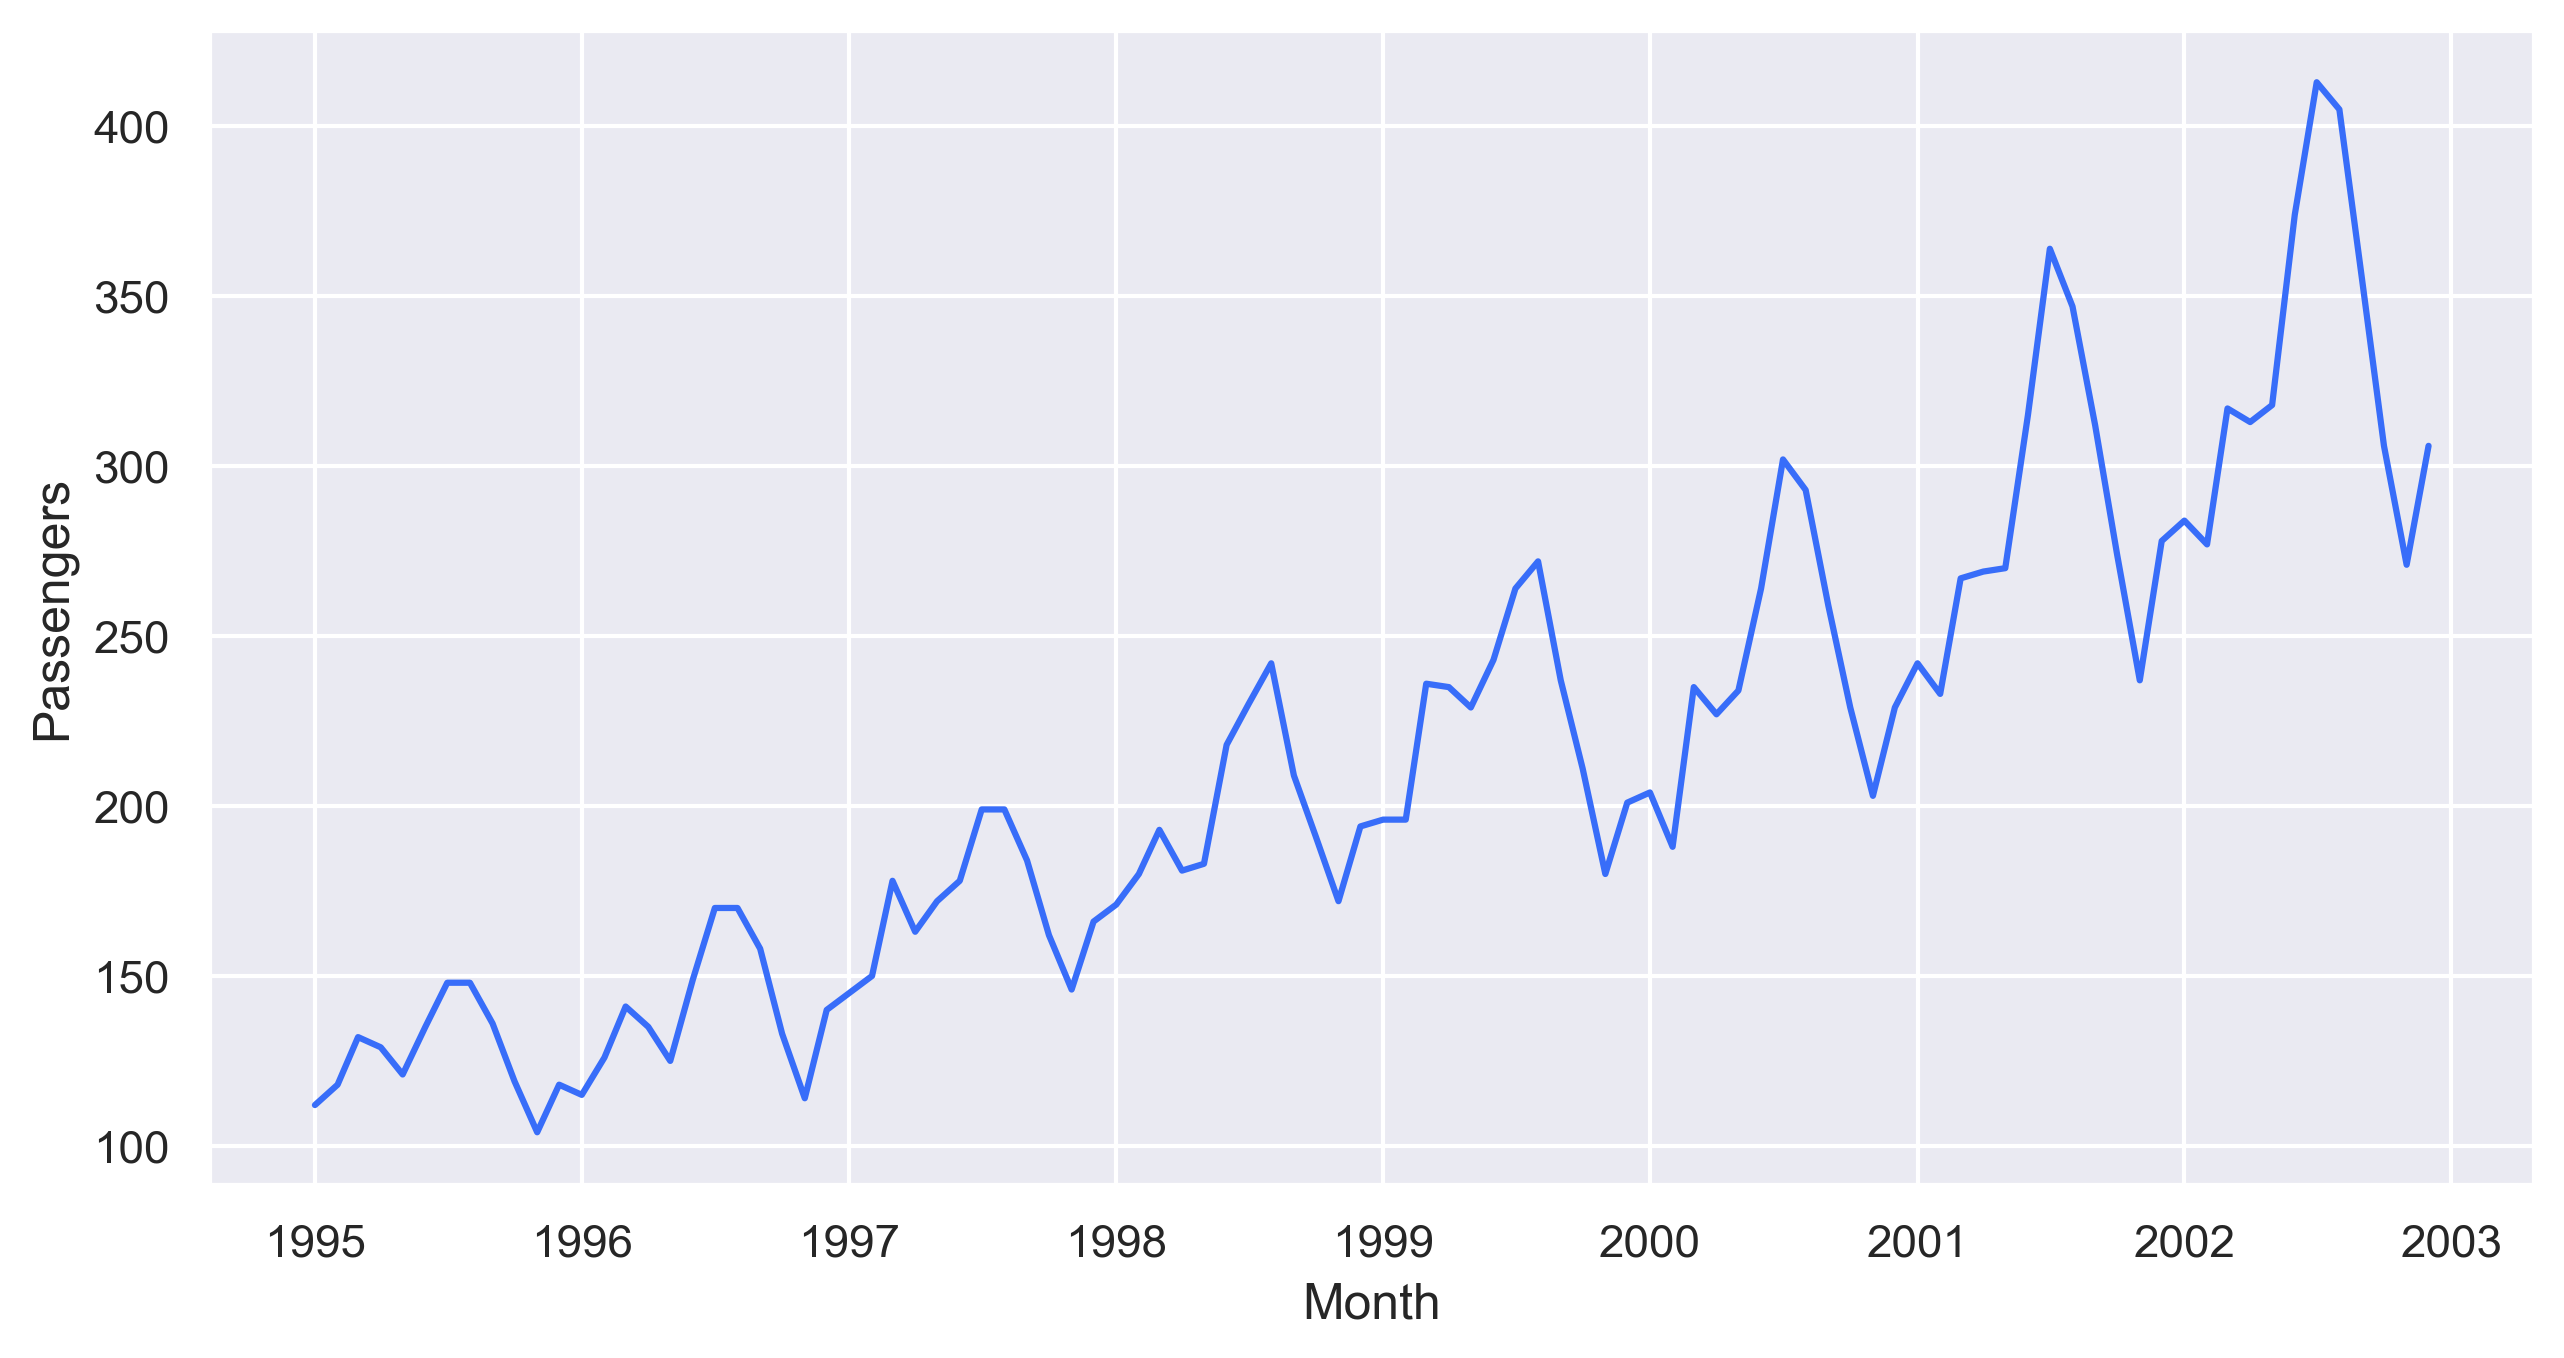

In [11]:
sns.lineplot(df['Passengers'])

In [12]:
# Splitting data

In [13]:
Train = df.head(76)
Test = df.tail(20)

In [14]:
Test

,Passengers,log_of_passengers,square_of_t,t,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12
Month,,,,,,,,,,,,,,,,
2001-05-01,270,5.598422,25,5,0,0,0,0,1,0,0,0,0,0,0,0
2001-06-01,315,5.752573,36,6,0,0,0,0,0,1,0,0,0,0,0,0
2001-07-01,364,5.897154,49,7,0,0,0,0,0,0,1,0,0,0,0,0
2001-08-01,347,5.849325,64,8,0,0,0,0,0,0,0,1,0,0,0,0
2001-09-01,312,5.743003,81,9,0,0,0,0,0,0,0,0,1,0,0,0
2001-10-01,274,5.613128,100,10,0,0,0,0,0,0,0,0,0,1,0,0
2001-11-01,237,5.468060,121,11,0,0,0,0,0,0,0,0,0,0,1,0
2001-12-01,278,5.627621,144,12,0,0,0,0,0,0,0,0,0,0,0,1
2002-01-01,284,5.648974,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

138.11944487323402

In [16]:
#Exponential

Exp = smf.ols('log_of_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

314.9450812877384

In [17]:
#Quadratic 

Quad = smf.ols('Passengers~t+square_of_t',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","square_of_t"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

134.3273374608234

In [18]:
#Additive seasonality 
add_sea = smf.ols('Passengers~t_1+t_2+t_3+t_4+t_5+t_6+t_7+t_8+t_9+t_10+t_11',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9','t_10','t_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

132.25413439949486

In [19]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+square_of_t+t_1+t_2+t_3+t_4+t_5+t_6+t_7+t_8+t_9+t_10+t_11',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9','t_10','t_11','t','square_of_t']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

132.25413439952692

In [20]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_of_passengers~t+t_1+t_2+t_3+t_4+t_5+t_6+t_7+t_8+t_9+t_10+t_11',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

314.92426103796834

In [21]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,132.254134
4,rmse_add_sea_quad,132.254134
2,rmse_Quad,134.327337
0,rmse_linear,138.119445
5,rmse_Mult_sea,314.924261
1,rmse_Exp,314.945081


In [22]:
# Moving Average

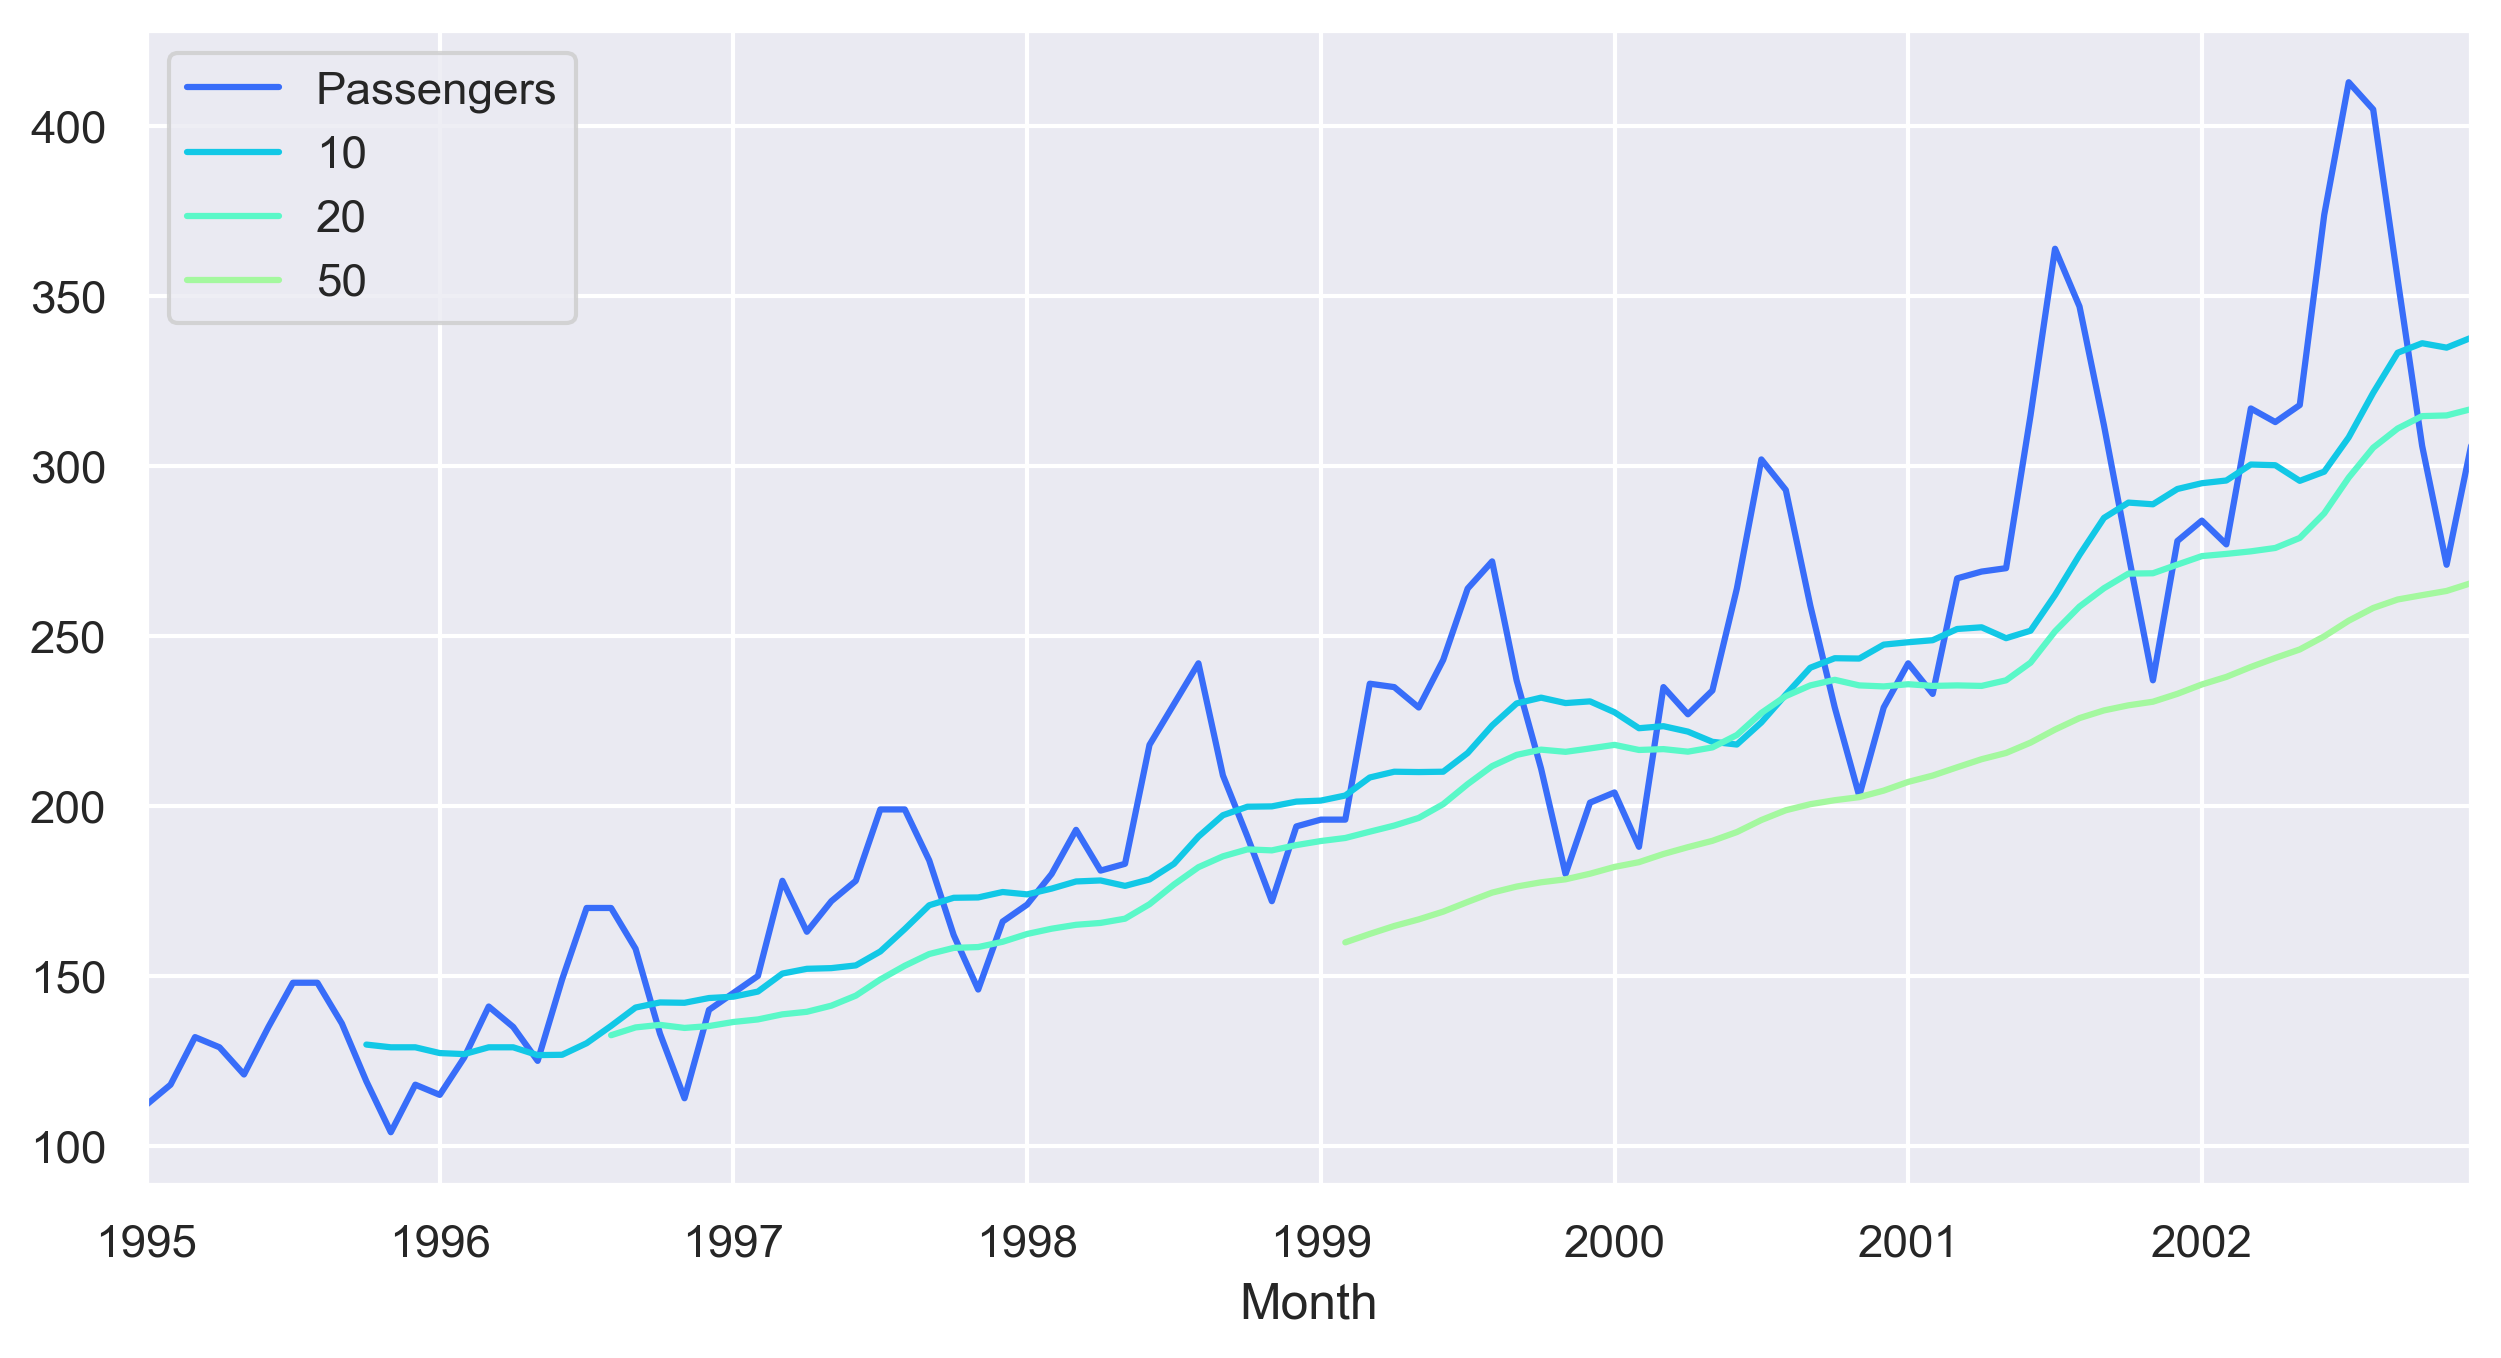

In [23]:
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot(label = '10')
df['Passengers'].rolling(20).mean().plot(label = '20')
df['Passengers'].rolling(50).mean().plot(label = 50)
plt.legend()

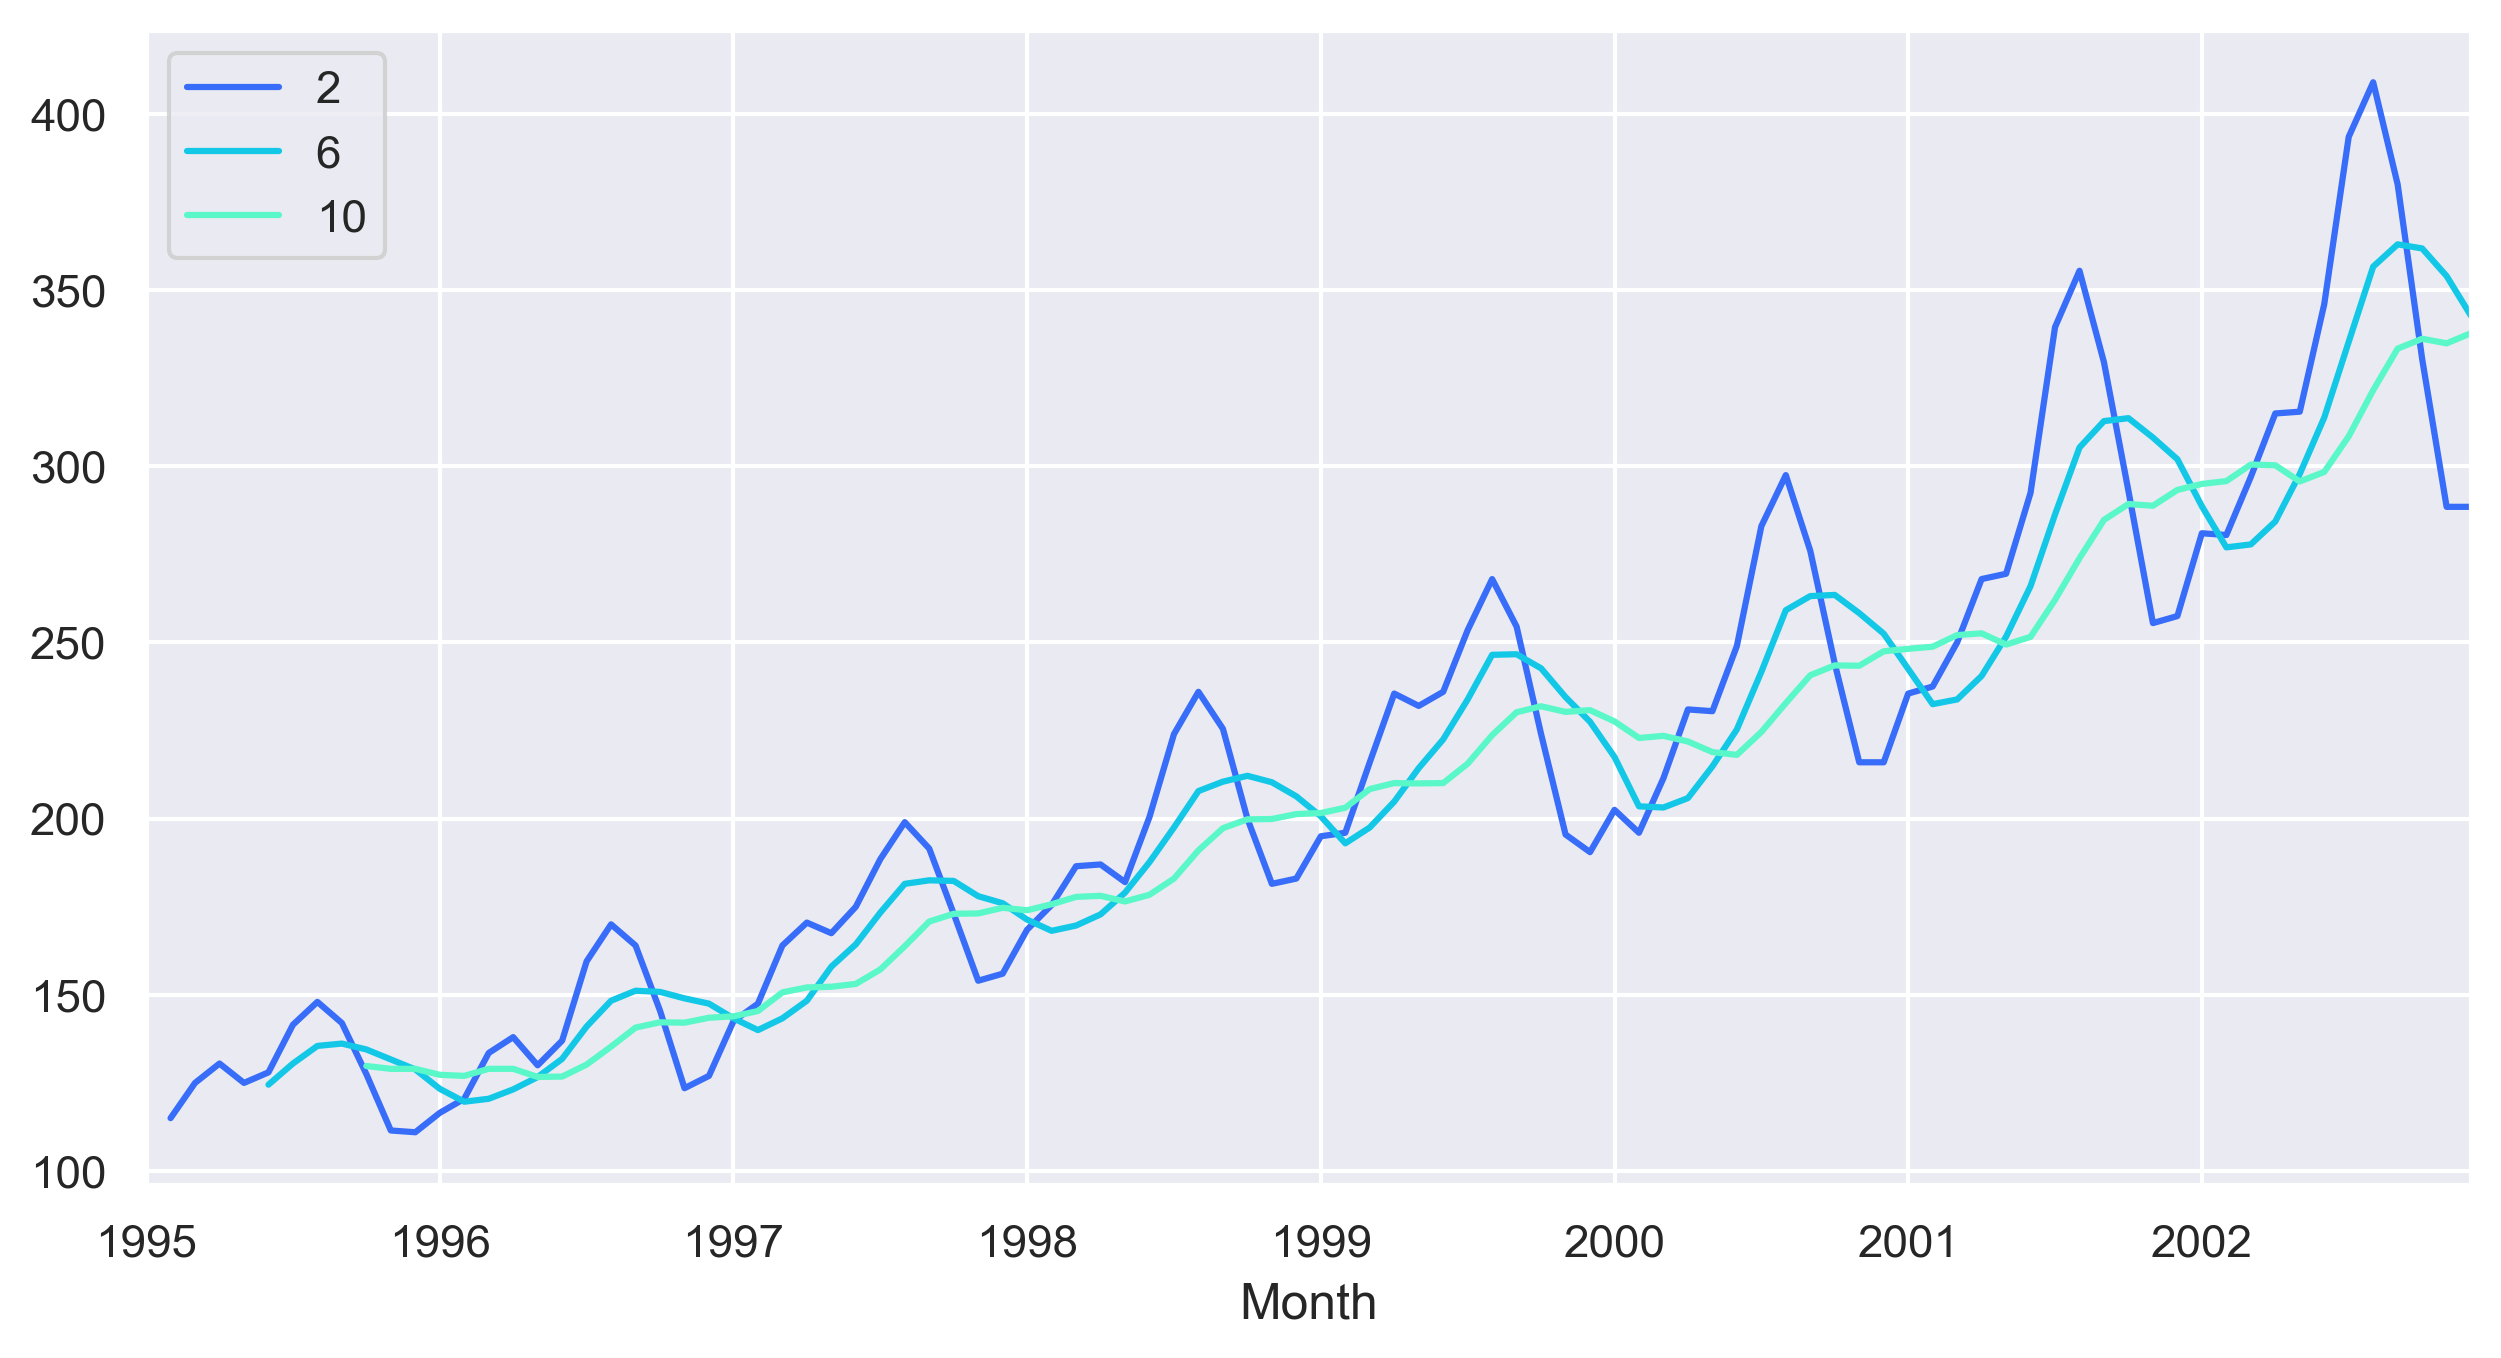

In [24]:
for i in range(2,12,4):
    df['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.legend()

In [25]:
# Weighted Moving Average

In [26]:
weights = np.array([0.1, 0.2, 0.3,0.4])
df['WMA'] = df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Passengers,log_of_passengers,square_of_t,t,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,WMA
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0,NaN
1995-02-01,118,4.770685,4,2,0,1,0,0,0,0,0,0,0,0,0,0,NaN
1995-03-01,132,4.882802,9,3,0,0,1,0,0,0,0,0,0,0,0,0,NaN
1995-04-01,129,4.859812,16,4,0,0,0,1,0,0,0,0,0,0,0,0,126.0
1995-05-01,121,4.795791,25,5,0,0,0,0,1,0,0,0,0,0,0,0,125.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,6.003887,64,8,0,0,0,0,0,0,0,1,0,0,0,0,392.5
2002-09-01,355,5.872118,81,9,0,0,0,0,0,0,0,0,1,0,0,0,383.5
2002-10-01,306,5.723585,100,10,0,0,0,0,0,0,0,0,0,1,0,0,351.2


<Axes: xlabel='Month'>

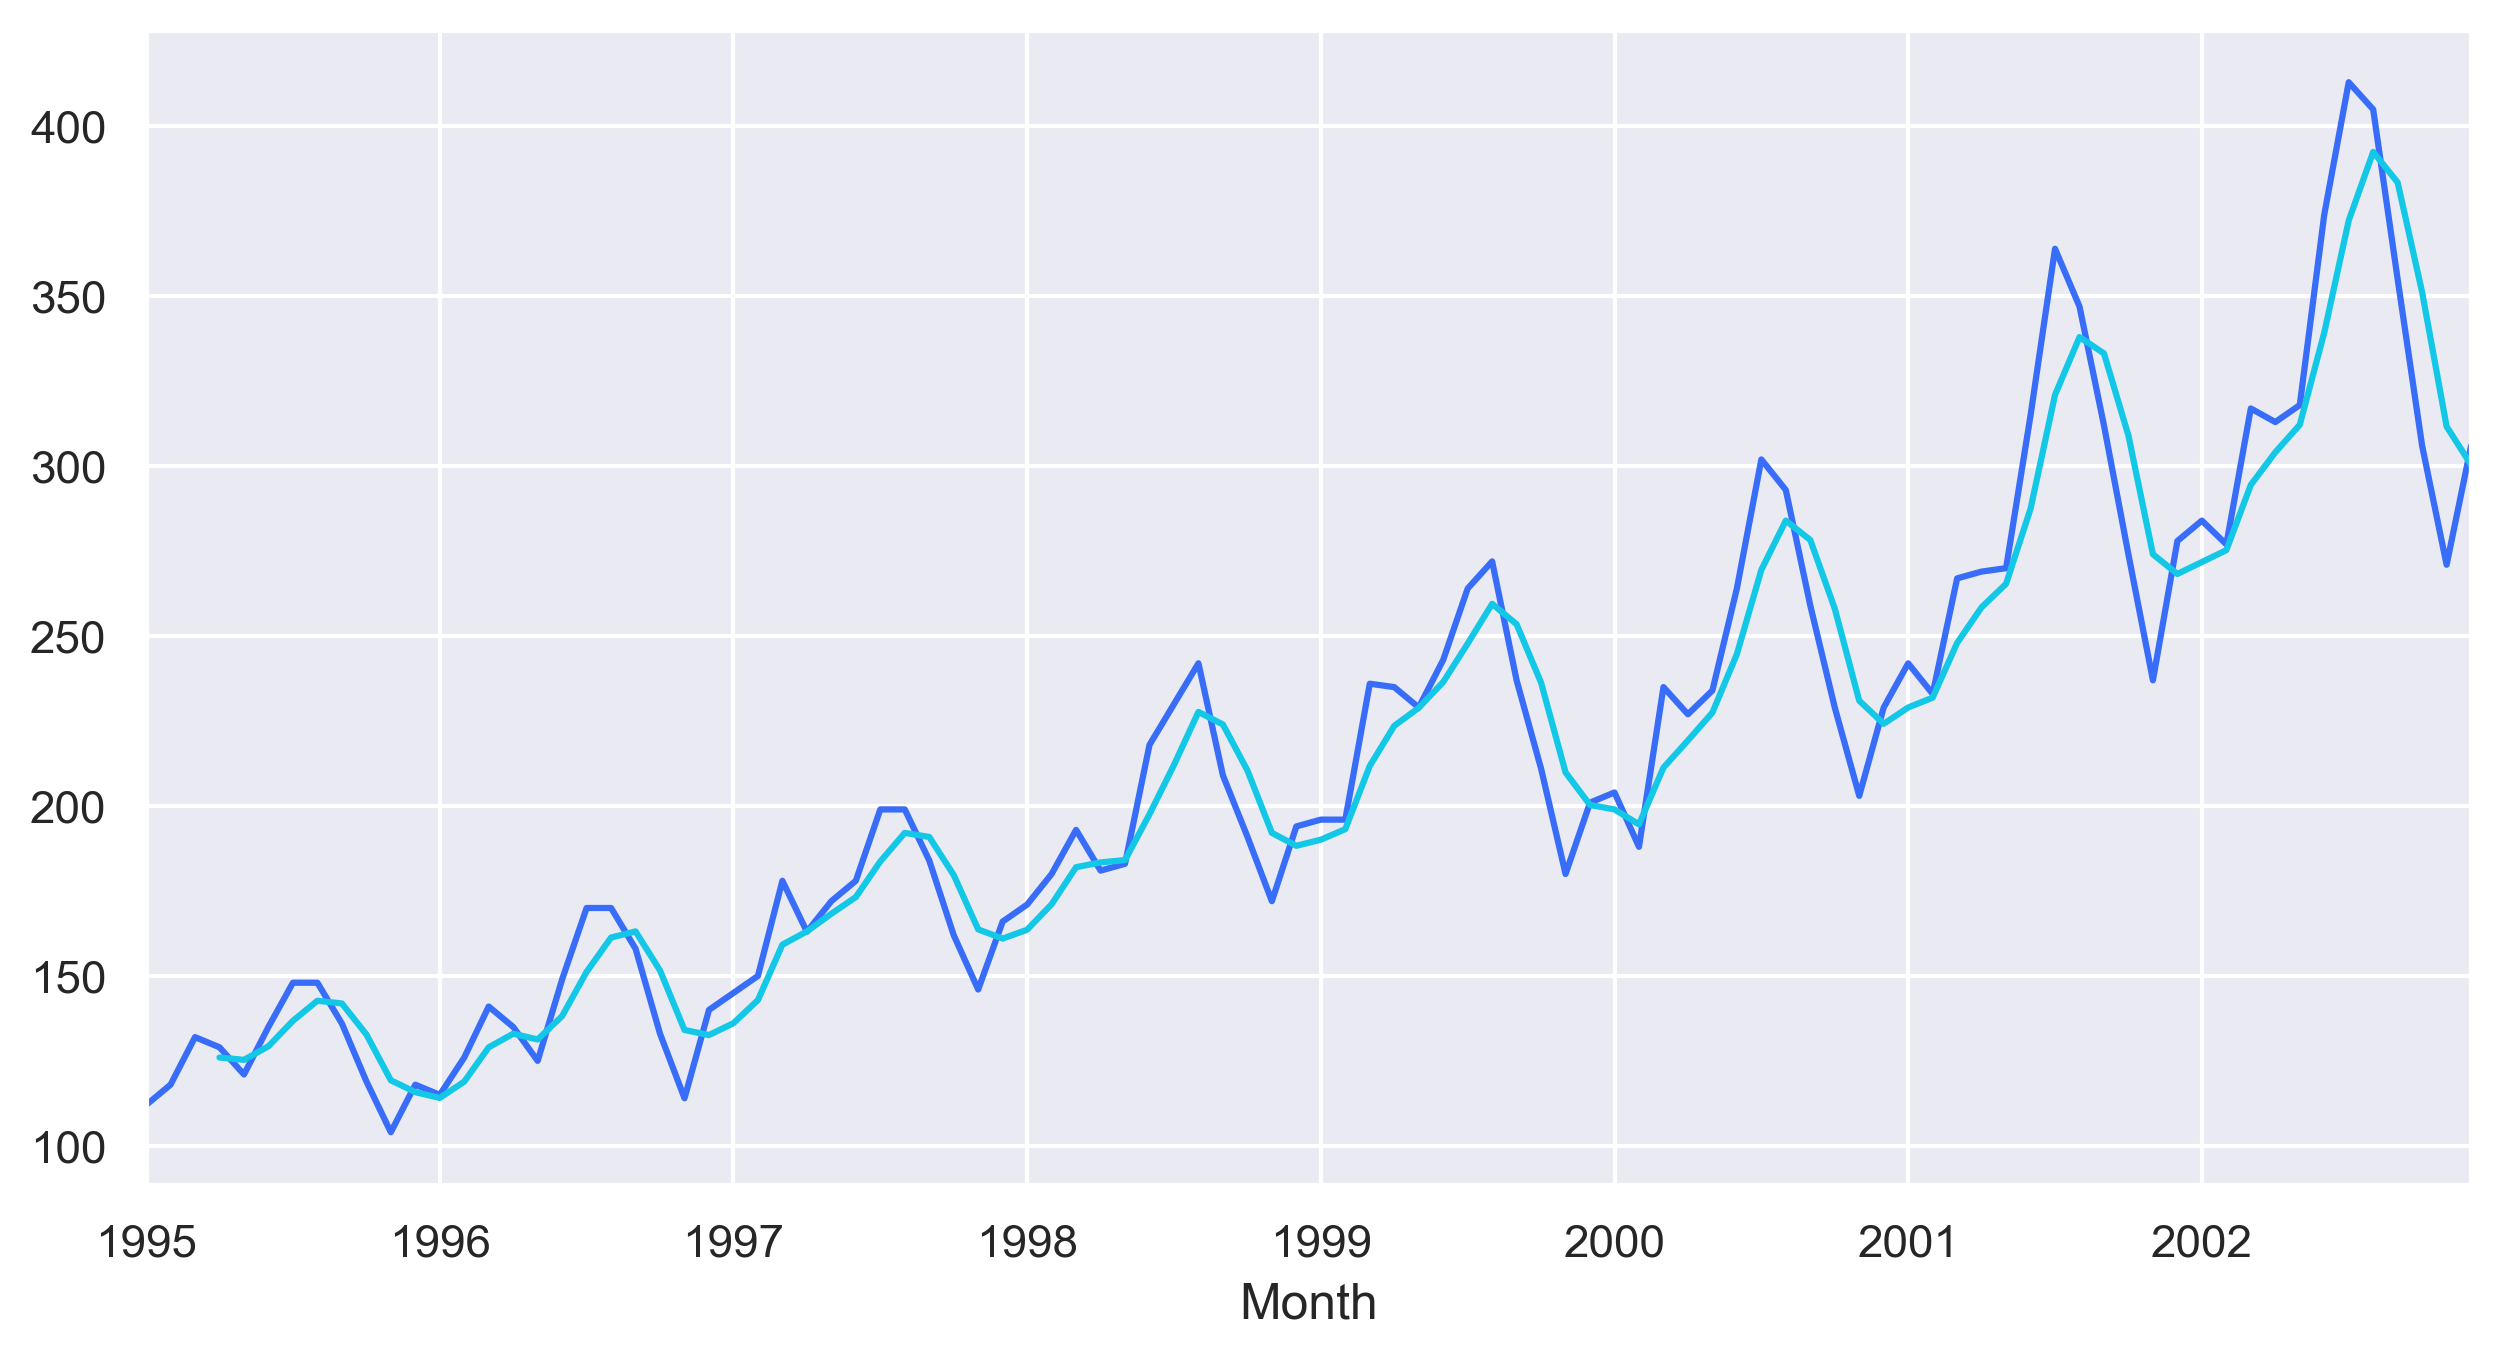

In [27]:
df['Passengers'].plot()
df['WMA'].plot()

# Arima Model

In [28]:
df = pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [29]:
# Check stationarity of the data

<Axes: xlabel='Month'>

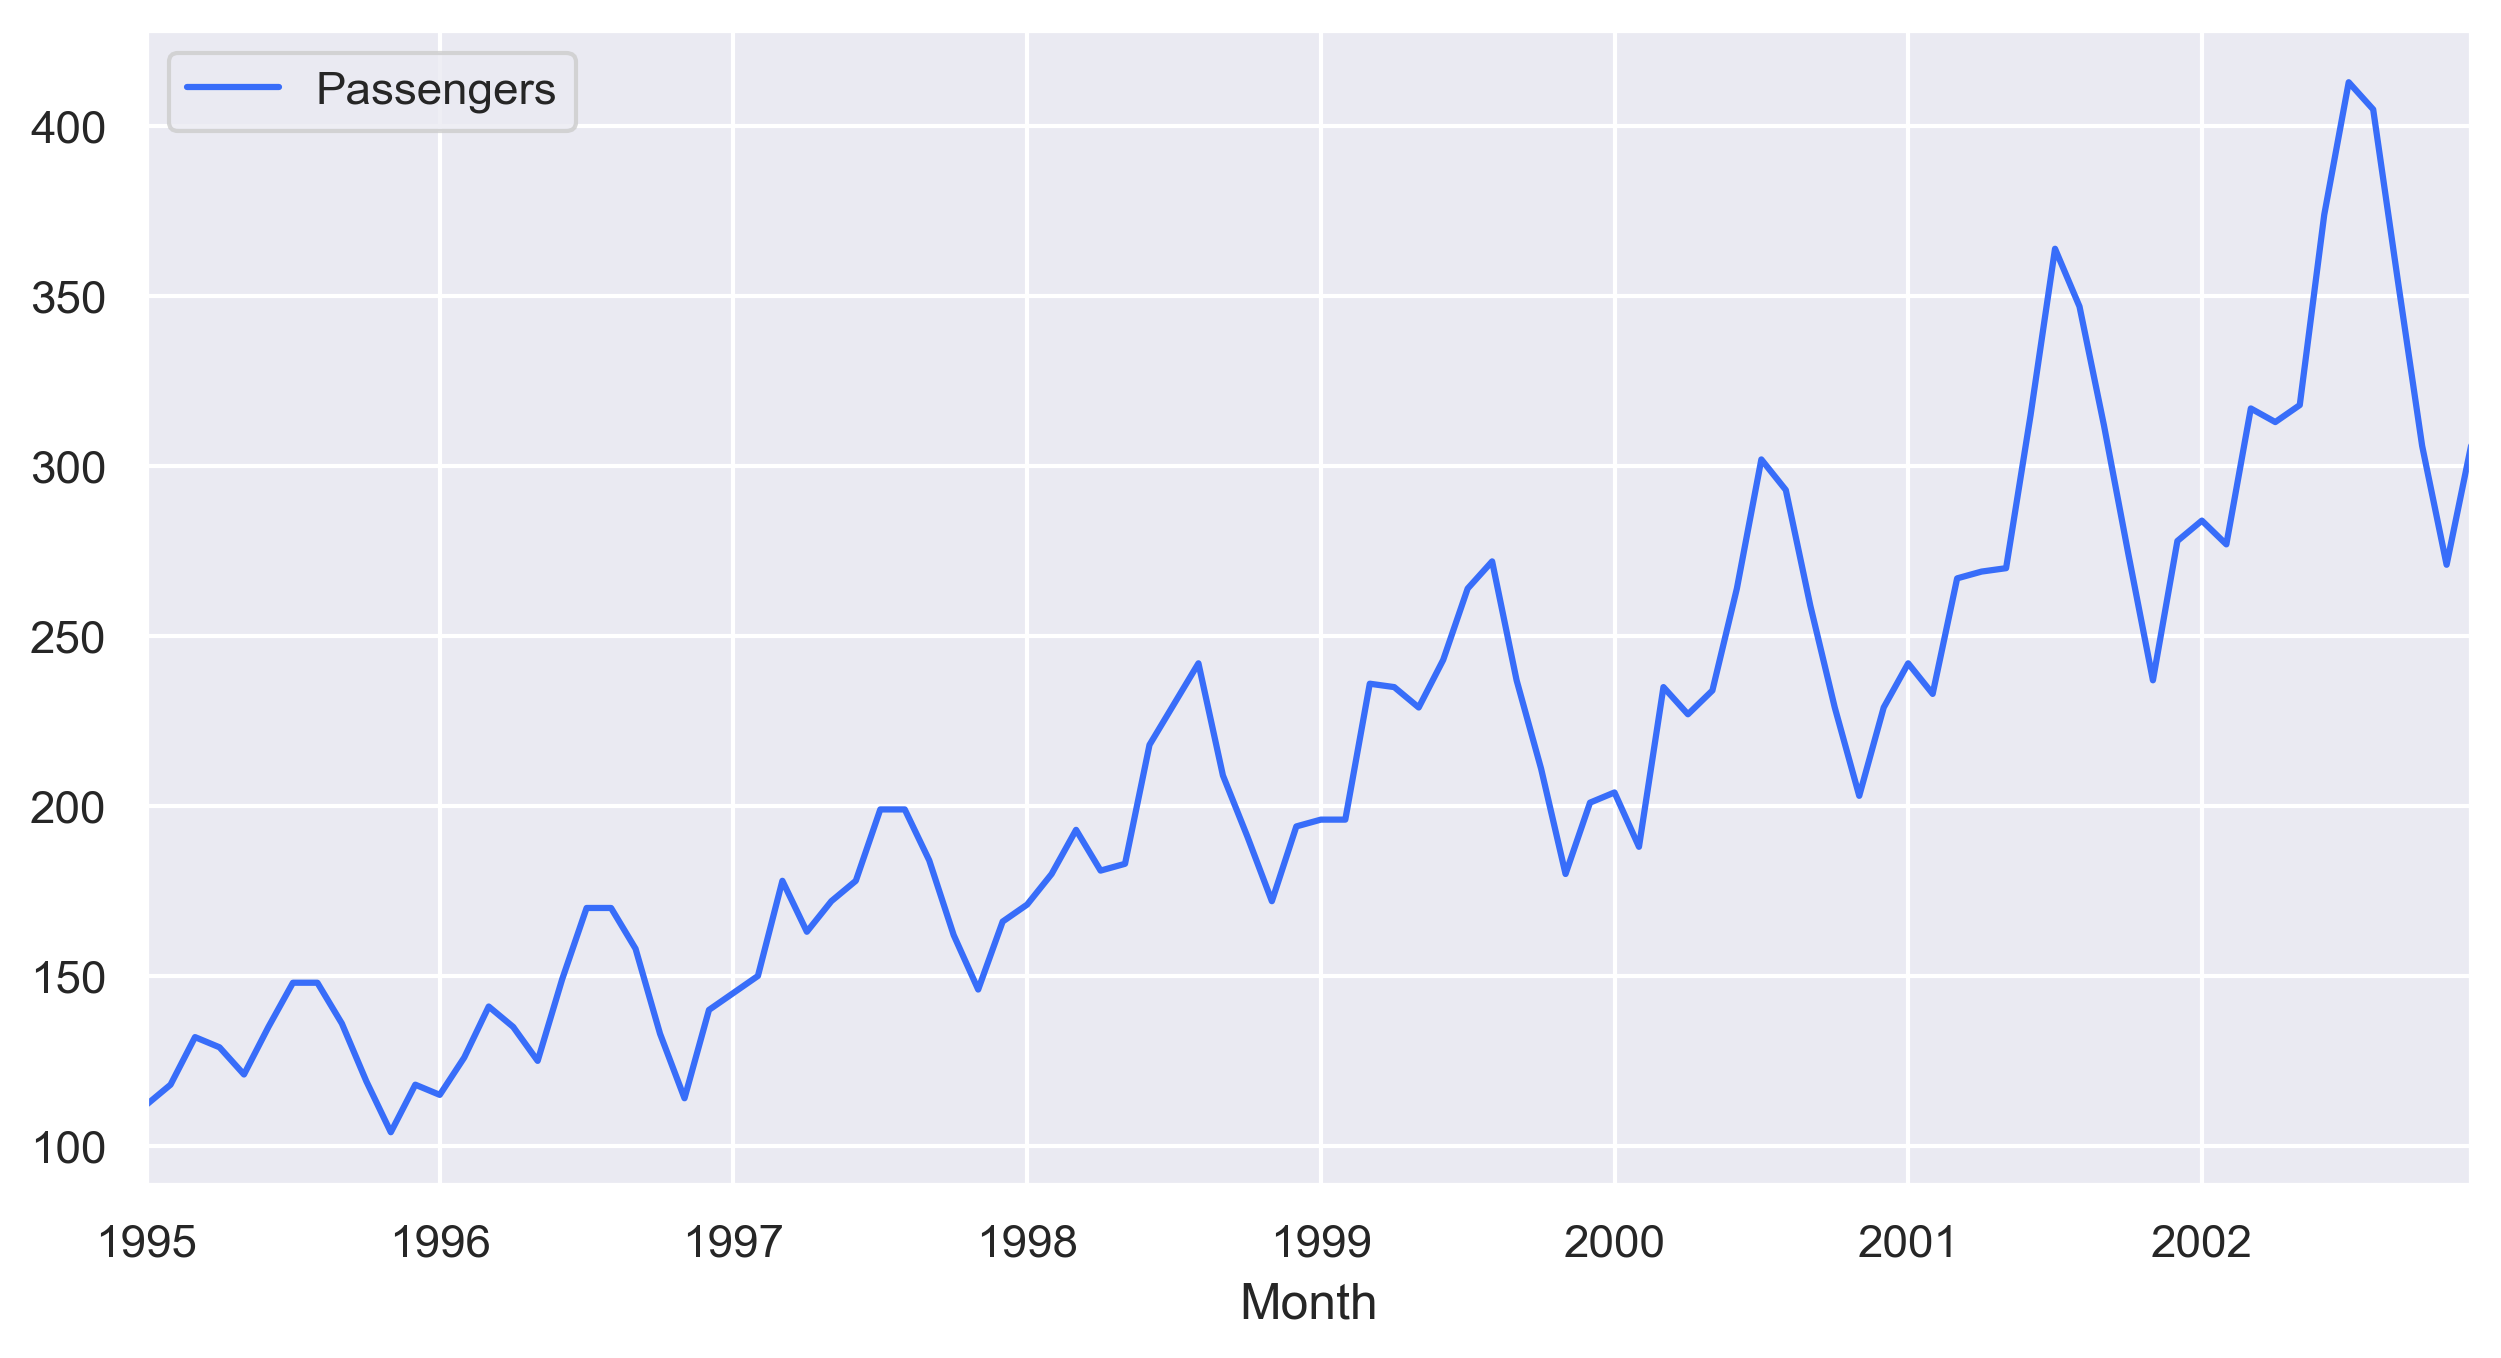

In [30]:
df.plot()

In [31]:
adfuller(df['Passengers'])[1].round(5)

0.99683

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

According the p-value, the dataset is non stationary as the p value is more than alpha value.

Arima model building.

- ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
- First, we need to find out the order of arima model.

In [32]:
#find out order of arima

In [33]:
order = auto_arima(df['Passengers'])

In [34]:
order#(p,d,q)=>p=PACF,d=differencing method value,q=ACF,

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
df.shape

(96, 1)

In [36]:
#Split the data
train = df.head(80)
test = df.tail(16)

In [37]:
train.shape

(80, 1)

In [38]:
test.shape

(16, 1)

In [39]:
#Arima model

In [40]:
model = ARIMA(train['Passengers'], order=(3,1,2)).fit()

C:\Users\rites\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rites\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rites\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
# Evaluating the model

In [47]:
ypred = model.predict(start =80, end = 95)
ypred

2001-09-01    321.680320
2001-10-01    307.963037
2001-11-01    298.494772
2001-12-01    297.618301
2002-01-01    296.303524
2002-02-01    298.335526
2002-03-01    297.991844
2002-04-01    299.398696
2002-05-01    298.744076
2002-06-01    299.541887
2002-07-01    298.859761
2002-08-01    299.419773
2002-09-01    298.875193
2002-10-01    299.325009
2002-11-01    298.911227
2002-12-01    299.272920
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
Arima=np.sqrt(mean_squared_error(test['Passengers'], ypred))
Arima

50.420350234835354

In [44]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","Arima"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea,Arima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,Arima,50.420350
3,rmse_add_sea,132.254134
4,rmse_add_sea_quad,132.254134
2,rmse_Quad,134.327337
0,rmse_linear,138.119445
5,rmse_Mult_sea,314.924261
1,rmse_Exp,314.945081


In [45]:
#observation:ARIMA model RMSE value is the best